Intro to CNNs
If you see a picture of a dog, you are very quickly able to determine that is in fact a picture of a dog and not a picture of a cat. However,
this is a difficult task for a computer since computers do not have the same ability to visualize images as we do.

Convolutional Neural Networks (CNNs) revolutionized computer vision because of how well they do at working with image data. While
they can be used for other types of data, they are most common to use with image data due to how efficiently they are able to work with
large amounts of data.

Working with Image Data
When working with images, we need a way to turn pictures as we see them into a format that computers can recognize. To do this, each
pixel in the image becomes a value in an array. For colored pictures, each pixel has a color value, which is a certain amount of each of
red, green, and blue.

Click on the image for source

CNNs
CNNs work using convolutional layers and pooling layers.
Convolutional layers are based on the mathematical operation of convolution, in which filters are used on sections of the image at a
time. The effect that this has is that each layer of a network can essentially detect different image components - maybe one layer
detects edges, one detects eyes, one detects ears, etc. to eventually classify the image.

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Import data
# The dataset we will use here is the MNIST data that is built into Keras. This data has a bunch of handwritten digits from 0-9. The task is
# to classify which digit each image is. Again, this is an easy task for us to do, but a historically difficult task for a computer.


# Get data - it is already split into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)

In [3]:
# Scale data
# We want to scale our data between 0 and 1. This is a common choice because it can improve speed.
# Since our pixels are numeric values between 0 and 255, we can simply divide by the maximum value to accomplish this.
# Scale data between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [4]:
# Reshape data
# We now need to reshape our data. Currently, each image is 28 pixels by 28 pixels. Since each pixel only has one color value, we need
# to reshape this to be 28x28x1. If we had RBG (red, blue, green) values, we might reshape this to be 28x28x3.
# Reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
# Format target
# We also need to convert our target into a category.
# Since our target is numeric (0, 1, 2, 3, etc.), our computer is going to recognize the higher digits as having higher numeric value.
# However, all we are doing in this problem is classifying which image is which. A 9 should not have more value than a 1 in this case.
# Classifying an 8 as a 7 is not better than classifying it as a 2 - they are both just incorrect.
# Thankfully, Keras makes this easy for us using the to_categorical class!
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [6]:
# Now we can build our CNN!
# Step 1: Define our network structure
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [8]:
# Sequential model
model = Sequential()

In [9]:
# We can now add our hidden layers! We will use one convolutional layer followed by a pooling layer, a flattening layer, and finally a
# dense output layer.
# Since we are doing multiclass classification here, the softmax activiation function will be used in our output layer.

# Convolutional layer
model.add(Conv2D(filters = 8, # How many filters you want to use
kernel_size = 3, # size of each filter
input_shape = input_shape)) # What is the shape of your input features (we defined this above)

# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, # How many output possibilities we have

activation = 'softmax')) # What activation function are you using?

In [10]:
# Step 2: Compile our model
# Since this is a multiclass classification problem, we will use categorical crossentropy as our loss function. We can also track the
# accuracy over time by specifying this in the metrics parameter.

# Step 2: Compile
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

Epoch 1/20


1875/1875 [==============================] - 9s 4ms/step - loss: 0.3543 - acc: 0.9021 - val_loss: 0.2200 - val_acc: 0.9392
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1898 - acc: 0.9474 - val_loss: 0.1529 - val_acc: 0.9572
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1395 - acc: 0.9604 - val_loss: 0.1324 - val_acc: 0.9605
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1123 - acc: 0.9677 - val_loss: 0.1061 - val_acc: 0.9675
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0975 - acc: 0.9712 - val_loss: 0.1004 - val_acc: 0.9698
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0859 - acc: 0.9744 - val_loss: 0.0955 - val_acc: 0.9721
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0777 - acc: 0.9771 - val_loss: 0.0958 - val_acc: 0.9690
Epoch 8/20
1875/1875 [==============================] - 7s 4

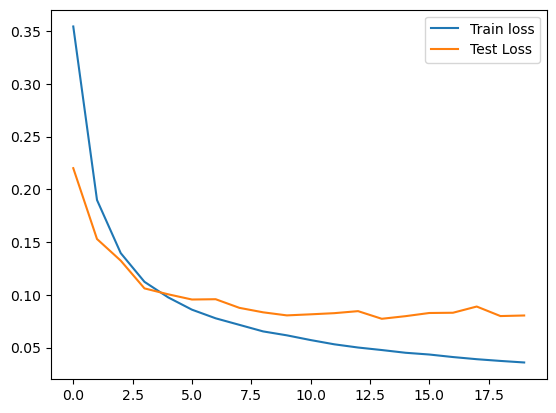

In [11]:
# Step 3: Fit our model
# Step 3: Fit our model
history = model.fit(X_train, y_train,

validation_data = (X_test, y_test),
epochs=20)

# Visualize the loss

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

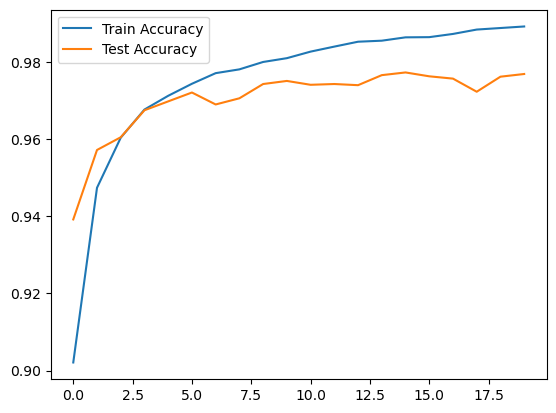

In [13]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();